![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

## Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


AttributeError: 'str' object has no attribute 'dtype'

In [16]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2455 non-null   object
 1   internet_usage  2455 non-null   int64 
 2   sex             2455 non-null   object
 3   age             2455 non-null   int64 
 4   education       2455 non-null   object
dtypes: int64(2), object(3)
memory usage: 96.0+ KB


## Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

In [25]:
df_internet = pd.get_dummies(df_internet.drop(columns = 'name'),drop_first=True)

In [28]:
df_internet.isnull().sum()

internet_usage            0
age                       0
sex_Male                  0
education_High School     0
education_Higher Level    0
education_No studies      0
education_PhD             0
education_University      0
dtype: int64

In [29]:
target = df_internet['internet_usage']
features = df_internet.drop(columns = 'internet_usage')

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model_dt = DecisionTreeClassifier()

In [32]:
model_dt.fit(X=features,y=target)

DecisionTreeClassifier()

In [2]:
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
...,...,...,...,...,...
2453,Christine,1,Male,31,High School
2454,Kimberly,0,Male,52,Elementary


### Calculate Predictions

In [34]:
model_dt.predict_proba(X=features)[:5]

array([[1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ]])

### Create a New DataFrame for the Predictions

In [ ]:
df_internet['']

### Visualize the Model

In [35]:
from sklearn.tree import plot_tree

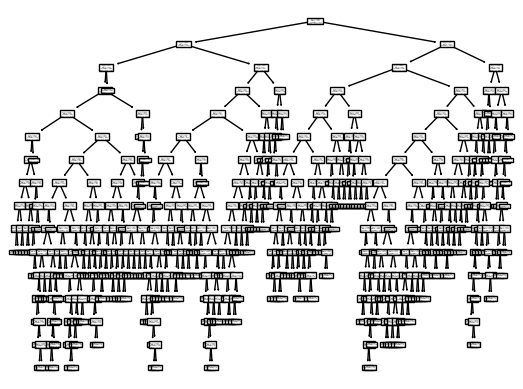

In [37]:
plot_tree(decision_tree=model_dt);

In [38]:
features.columns

Index(['age', 'sex_Male', 'education_High School', 'education_Higher Level',
       'education_No studies', 'education_PhD', 'education_University'],
      dtype='object')

In [48]:
model_dt=DecisionTreeClassifier(max_depth=3)

In [49]:
model_dt.fit(X=features,y=target)

DecisionTreeClassifier(max_depth=3)

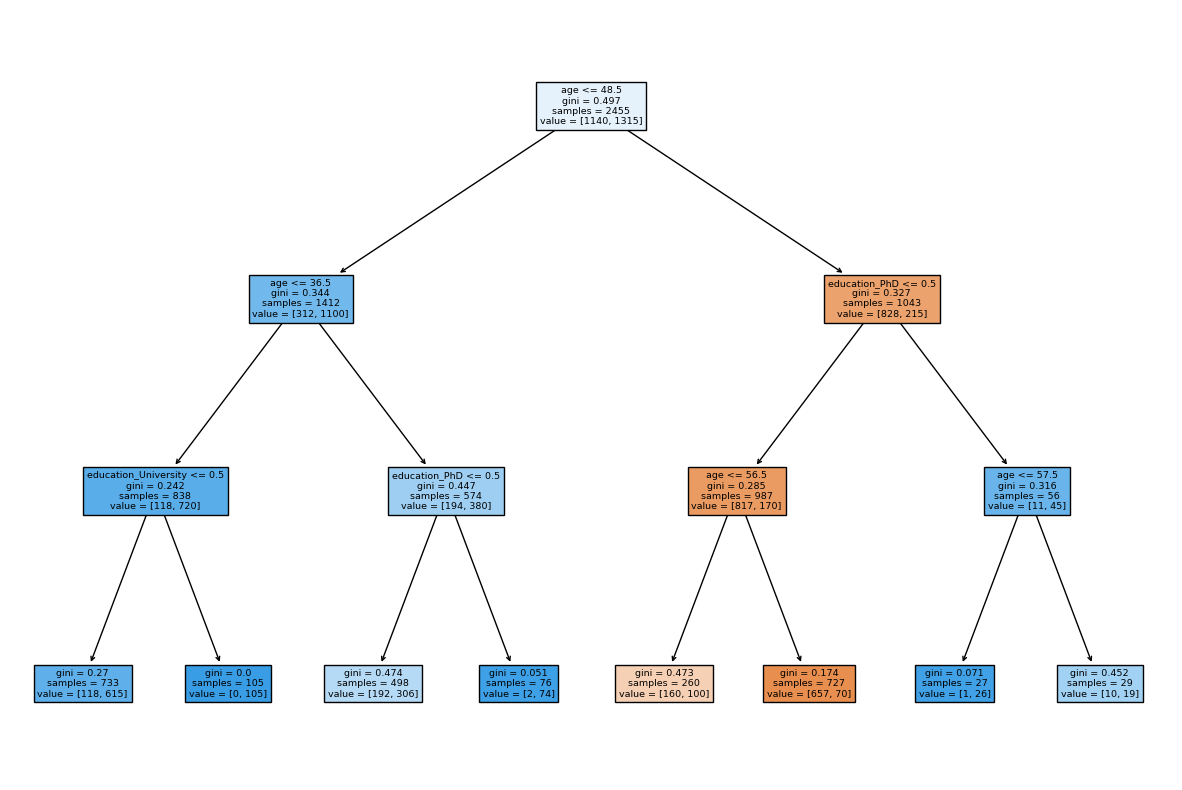

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10)) 


plot_tree(decision_tree=model_dt,feature_names=features.columns,filled=True);

### Model Interpretation

### Model's Score

In [ ]:
model_dt.sco

In [ ]:
model_dt.

## Confusion Matrix

In [ ]:
from sklearn.metrics import con

### Classification Report

### Sensitivity (Recall=1)

### Specificity (Recall=0)

### ROC Curve

## `RandomForestClassifier()` in Python

### Fit the Model

### Calculate Predictions

### Model's Score

## `SVC()` in Python

### Fit the Model

### Calculate Predictions

### Model's Score

## Which One Is the Best Model? Why?

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [ ] Another way to **compare real data with predictions** from the model.
- [ ] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ ] Distinguish **probability's role** to optimize this type of models.
- [ ] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [ ] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.